# Simulacion sistemas punto 3

In [1]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Función 1: y[n] = x[n]/3 + 2x[n-1] - y[n-1]
def sistema1(x):
    y = np.zeros_like(x)
    for n in range(1, len(x)):
        y[n] = (1/3)*x[n] + 2*x[n-1] - y[n-1]
    return y

In [3]:
# Función 2: y[n] = sum_{k=-∞}^n x^2[k]
def sistema2(x):
    y = np.zeros_like(x)
    for n in range(len(x)):
        y[n] = np.sum(x[:n+1]**2)
    return y

In [4]:
# Función 3: y[n] = mediana(x[n-1], x[n], x[n+1])
def sistema3(x):
    y = np.zeros_like(x)
    for n in range(1, len(x)-1):
        y[n] = np.median([x[n-1], x[n], x[n+1]])
    return y

In [5]:
# Función 4: y(t) = A * x(t) + B
def sistema4(x, A=2, B=3):
    return A * x + B

In [6]:
# Señal de prueba
n = np.arange(0, 20)
x = np.zeros_like(n, dtype=float)
x[5:10] = 1
x[10:15] = -1

In [7]:
# Aplicación de los sistemas
y1 = sistema1(x)
y2 = sistema2(x)
y3 = sistema3(x)
y4 = sistema4(x)

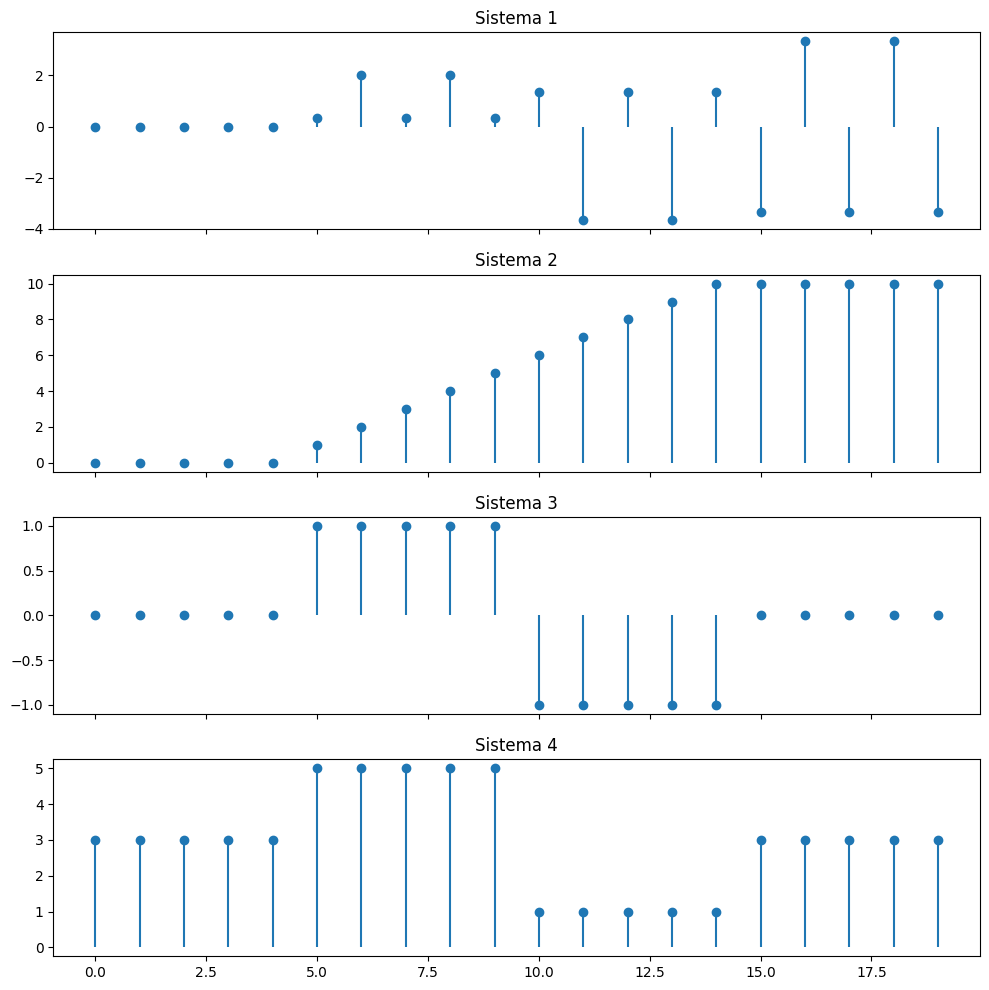

In [8]:
# Gráficas de comparación
fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
axs[0].stem(n, y1, basefmt=' ')
axs[0].set_title('Sistema 1')
axs[1].stem(n, y2, basefmt=' ')
axs[1].set_title('Sistema 2')
axs[2].stem(n, y3, basefmt=' ')
axs[2].set_title('Sistema 3')
axs[3].stem(n, y4, basefmt=' ')
axs[3].set_title('Sistema 4')
plt.tight_layout()
plt.show()

# Pregunta 4 - Convolución Discreta y Respuesta desde Escalón

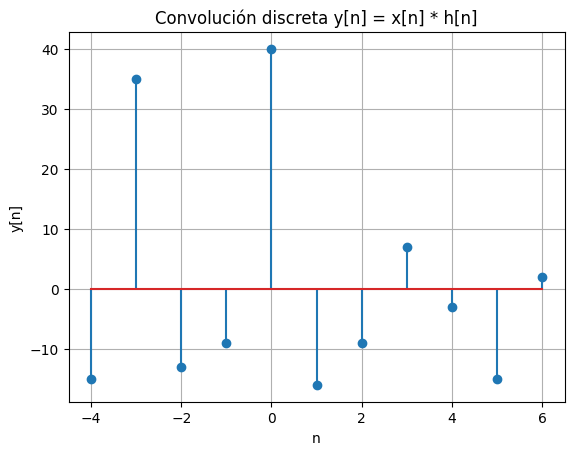

Salida y[n]: [-15  35 -13  -9  40 -16  -9   7  -3 -15   2]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Señales de entrada
x = np.array([-15, 5, -3, 0, 5, 7, -1])
h = np.array([1, -2, 0, 1, -2])

# n=0 está en el índice 2 para x, y en el índice 2 para h
# Convolución discreta
y = np.convolve(x, h)

# Ejes temporales
n_x = np.arange(-2, -2 + len(x))  # porque -3 está en n=0
n_h = np.arange(-2, -2 + len(h))  # porque 0 está en n=0
n_y = np.arange(n_x[0] + n_h[0], n_x[-1] + n_h[-1] + 1)

# Mostrar resultado
plt.stem(n_y, y)
plt.title("Convolución discreta y[n] = x[n] * h[n]")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

print("Salida y[n]:", y)

In [10]:

# Funciones desde el cuaderno original de convolución
def convgraf(h,x):
   lx = len(x)
   lh = len(h)
   M = 2*lx+lh
   xm = np.zeros((M,M))
   hm = np.r_[np.zeros((lx,1)),h,np.zeros((lx,1))]
   ym = np.zeros((M,M))
   for i in range(M-lx+1):
     xm[i:i+lx,i] = np.flip(x).reshape(-1)
     ym[i,i] = xm[:,i].T.dot(hm)
   return xm, ym, hm

def plot_conv(k,xm,ym,hm):
     plt.stem(xm[:,k],markerfmt='+',label='$x[k]$')
     plt.stem(hm,linefmt='g',markerfmt='.',label='$h[n-k]$')
     plt.stem(ym[:k,:].sum(axis=0),markerfmt='s',linefmt='r',label='$y[n]=\sum x[k]h[n-k]$')
     plt.legend()
     plt.show()
     return

xm, ym, hm = convgraf(h.reshape(-1,1), x.reshape(-1,1))

@interact(k=(0, xm.shape[0]-len(x), 1))
def show_frame(k=0):
    plot_conv(k,xm,ym,hm)


/tmp/ipython-input-10-1733474479.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ym[i,i] = xm[:,i].T.dot(hm)


interactive(children=(IntSlider(value=0, description='k', max=12), Output()), _dom_classes=('widget-interact',…

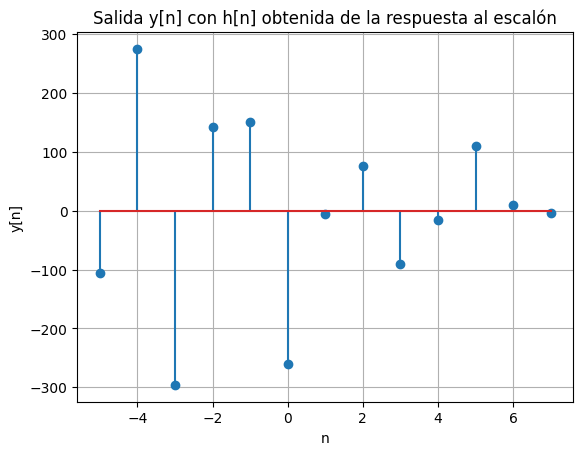

Nueva salida y[n] con h obtenida de escalón: [-105  275 -296  143  151 -260   -6   76  -91  -15  110    9   -3]


In [12]:
# Parte 2: Convolución con respuesta obtenida desde escalón

hu = np.array([-1, 6, -10, 3, 1, -10, 2, 5])
h_from_step = np.diff(hu)

y2 = np.convolve(x, h_from_step)

n_h2 = np.arange(-3, -3 + len(h_from_step))  # porque 3 está en n=0
n_y2 = np.arange(n_x[0] + n_h2[0], n_x[-1] + n_h2[-1] + 1)

plt.stem(n_y2, y2)
plt.title("Salida y[n] con h[n] obtenida de la respuesta al escalón")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

print("Nueva salida y[n] con h obtenida de escalón:", y2)